# Metropolis Algorithem


$$
p(x) = \frac{ \exp(-x^2)(2+ \sin(5x) + sin(2x)) }{ \int_{-\infty}^{\infty} \exp(-u^2)(2+ \sin(5u) + sin(2u)) du }
$$


In [41]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import pymc3

%matplotlib inline

FIGSIZE = (9, 6)
SAMPLESIZE = 100_000
BURN_IN = int(SAMPLESIZE * 0.25)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [17]:
def target(x: np.ndarray) -> np.ndarray:
    return np.exp(-(x**2)) * (2 + np.sin(5 * x) + np.sin(2 * x))

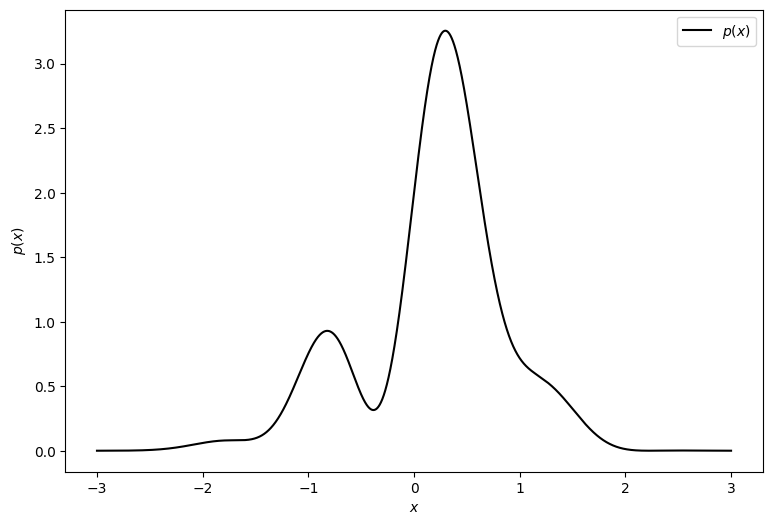

In [18]:
x = np.linspace(-3, 3, SAMPLESIZE)
y = target(x)

plt.figure(figsize=FIGSIZE)
plt.plot(x, y, color="k", label=r"$p(x)$")
plt.xlabel(r"$x$")
plt.ylabel(r"$p(x)$")
plt.legend()
# plt.savefig("target_plot.png")
plt.show()

In [19]:
def MetropolisSample(pdf, init_state, step_size, sample_size=SAMPLESIZE):
    current_state = init_state
    samples = []
    for _ in range(sample_size):
        candidate_state = np.random.normal(loc=current_state, scale=step_size)
        accept_prob = np.minimum(1.0, pdf(candidate_state) / pdf(current_state))
        if np.random.uniform() < accept_prob:
            current_state = candidate_state
        samples.append(current_state)
    return np.array(samples)

### Sample 1

init step = 0
step size = 1


In [20]:
np.random.seed(1)
samples = MetropolisSample(pdf=target, init_state=0, step_size=1)
print(f"Mean: {np.mean(samples)}\nVariance: {np.var(samples)}")

Mean: 0.18444205347946888
Variance: 0.4695426990666637


Text(0, 0.5, 'Accepted Value')

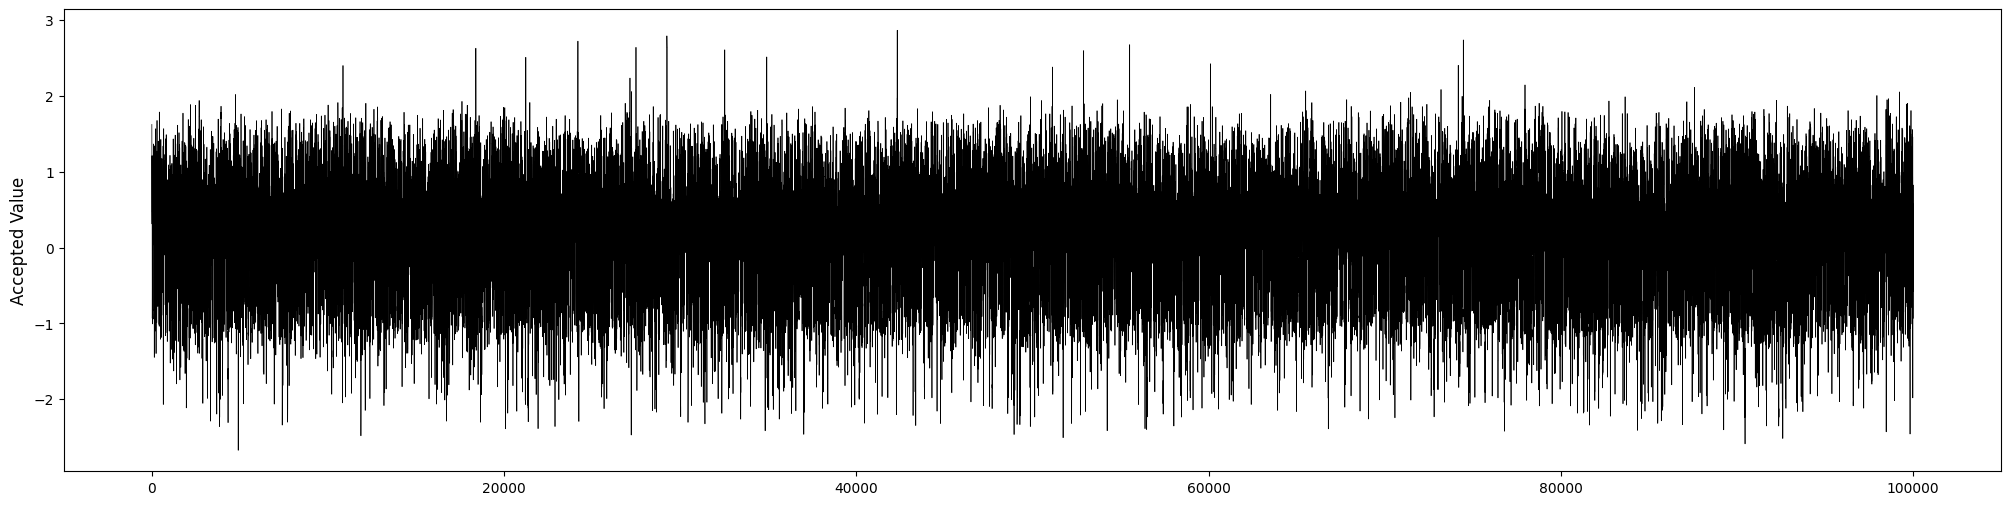

In [15]:
plt.figure(figsize=(25, 6))
sns.lineplot(x=range(SAMPLESIZE), y=samples, color="k", linewidth=0.5)
plt.ylabel("Accepted Value", fontsize=12)
# plt.savefig("accepted_value_of_sample1.png")

In [30]:
# reboving burn-in
print(f"Mean: {samples[BURN_IN:].mean()}")
print(f"Variance: {samples[BURN_IN:].var()}")

Mean: 0.18739632885083246
Variance: 0.46695035913141514


Text(0, 0.5, 'Frequency')

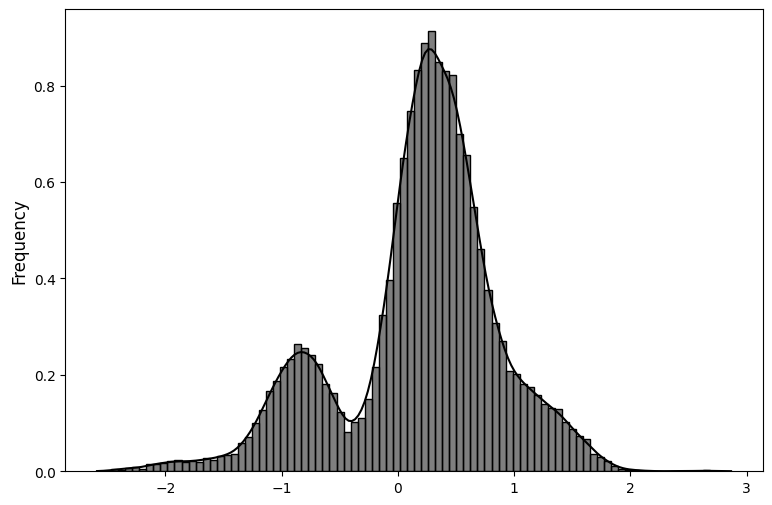

In [31]:
plt.figure(figsize=FIGSIZE)
sns.histplot(
    samples[BURN_IN:],
    stat="density",
    linewidth=1,
    color="black",
    # edgecolor="white",
    kde=True,
    bins=90,
)
plt.ylabel("Frequency", fontsize=12)
# plt.savefig("sample1_hist.png")

In [43]:
samples_wob = samples[BURN_IN:]
x1 = samples_wob[: int(len(samples_wob) * 0.1)]
x2 = samples_wob[int(len(samples_wob) * 0.5) :]
T = (x1.mean() - x2.mean()) / (np.sqrt(x1.var() + x2.var()))
pymc.geweke(samples_wob, fast=0.1, lest=0.5, intervals=20)

AttributeError: module 'pymc' has no attribute 'geweke'

### Sample 2

init state = -1, step size = 1


In [32]:
np.random.seed(2)
samples2 = MetropolisSample(pdf=target, init_state=-1, step_size=1)
print(f"Mean: {np.mean(samples2)}\nVariance: {np.var(samples2)}")

Mean: 0.18880237384381107
Variance: 0.47196649009986374


Text(0, 0.5, 'Accepted Value')

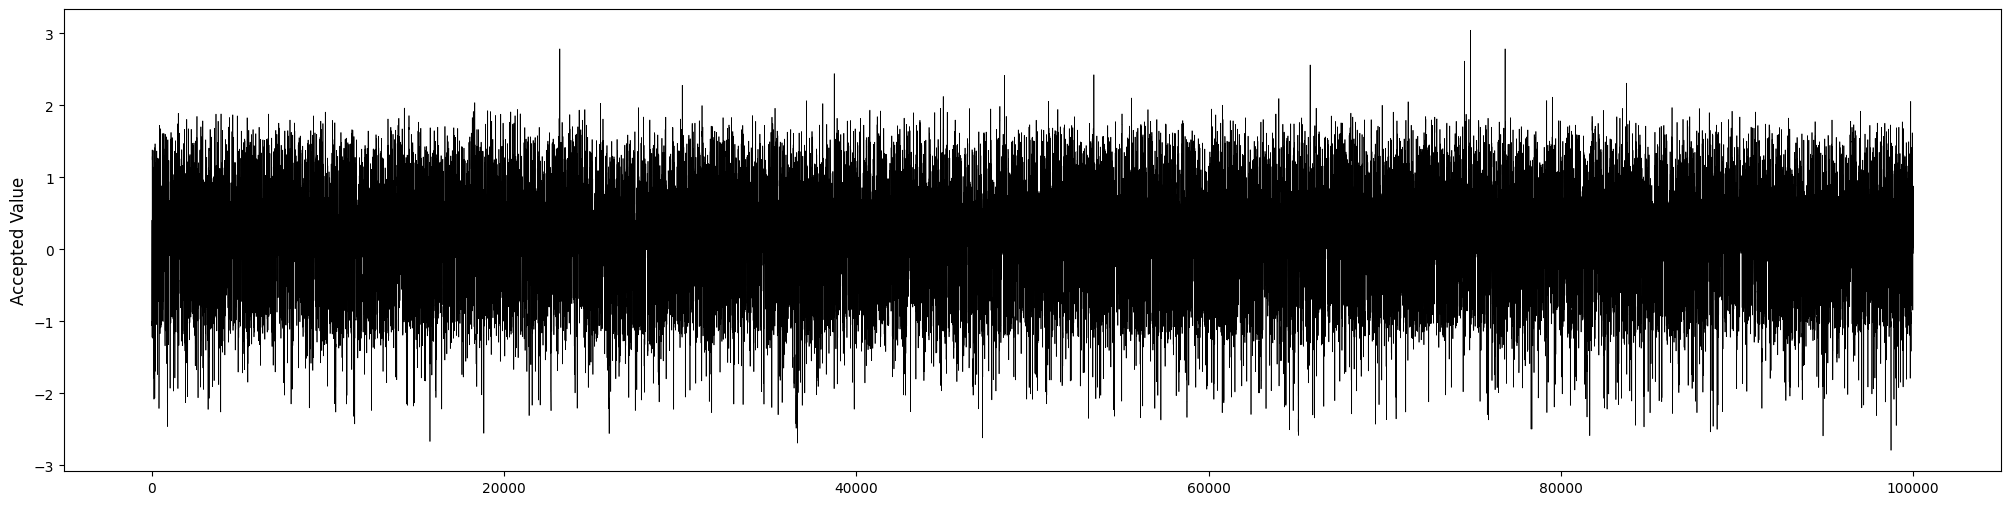

In [33]:
plt.figure(figsize=(25, 6))
sns.lineplot(x=range(SAMPLESIZE), y=samples2, color="black", linewidth=0.5)
plt.ylabel("Accepted Value", fontsize=12)

In [34]:
# reboving burn-in
print(f"Mean: {samples2[BURN_IN:].mean()}")
print(f"Variance: {samples2[BURN_IN:].var()}")

Mean: 0.18301010467674075
Variance: 0.4772089992083285


Text(0, 0.5, 'Frequency')

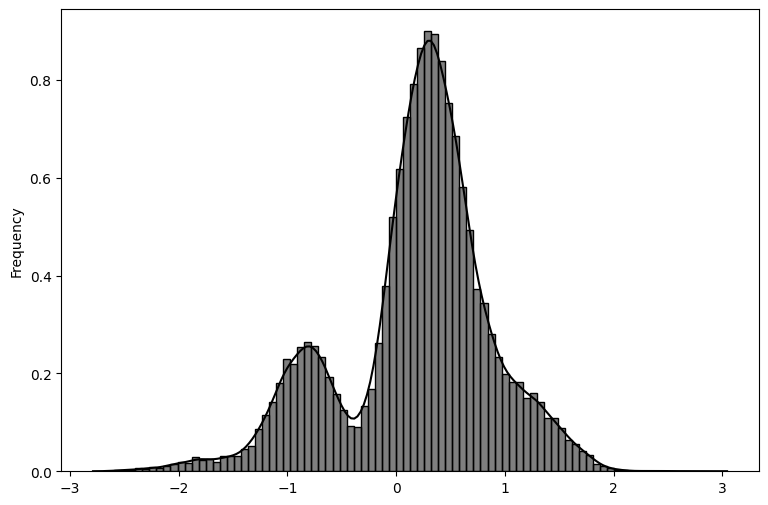

In [35]:
plt.figure(figsize=FIGSIZE)
sns.histplot(
    samples2[BURN_IN:],
    stat="density",
    kde=True,
    color="black",
    # edgecolor="white",
    linewidth=1,
    bins=90,
)
plt.ylabel("Frequency")